# Create Analytics with Large Language Models: Hotel Cancellations

- [View Solution Notebook](./solution.ipynb)
- [View Project Page](https://www.codecademy.com/projects/practice/create-analytics-with-gpt-hotel-cancellations)

## Task Group 1 - Setup

### Task 1

Run the cell below to import the data science libraries you will need for this project.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Task 2

Run the cell below to import the CSV file `hotel_bookings.csv` and assign it to the variable `hotels`. 

This version of the hotel bookings data set is available on [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) and contains data on two hotels: a city and a resort hotel. Here is also a related [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) article.

<details><summary style="display:list-item; font-size:16px; color:blue;">Here's a quick summary of the columns</summary>

- **hotel**: indicates if the hotel booked is a Resort Hotel or City Hotel
- **is_canceled**: indicates if the booking was canceled (**1**) or not (**0**)
- **lead_time**: Number of days between booking date and arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of arrival date
- **arrival_date_day_of_month**: Day of the month of arrival date
- **stays_in_weekend_nights**: Number of weekend nights booked (Sat-Sun)
- **stays_in_week_nights**: Number of weekday nights booked (Mon-Fri)
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked (Undefined/SC, BB, HB, or FB)
- **country**: Country of origin of the booker
- **market_segment**: Market segment (TA - travel agent, TO - tour operators)
- **distribution_channel**: Booking distribution channel (TA - travel agent, TO - tour operators)
- **is_repeated_guest**: 1 indicates a repeated guest else 0
- **previous_cancellations**: The number of previous bookings canceled by the customer
- **previous_bookings_not_canceled**: The number of previous bookings not canceled by the customer
- **reserved_room_type**: Room type reserved
- **assigned_room_type**: Type of assigned room booked
- **booking_changes**: Number of booking changes or modifications
- **deposit_type**: Type of deposit to guarantee booking (No Deposit, Non Refund, or Refundable)
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company that made the booking
- **days_in_waiting_list**: Number of days booking waws waitlisted before confirmation
- **customer_type**: The customer type of booking (Contract, Group, Transient, or Transient-party)
- **adr**: the average daily rate 
- **required_car_parking_spaces**: Number of parking spaces requested by the customer
- **total_of_special_requests**: Number of special requests by the customer
- **reservation_status**: The last reservation status (Canceled, Check-Out, No-Show)
- **reservation_status_date**: The date of the last reservation status

In [2]:
hotels = pd.read_csv("hotel_bookings.csv")
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Task 3

Let's take a look at the information contained in each column such as the number of rows, missing values, and data types.

Run the cell below to apply the `.info()` method to print out information about our `hotels` DataFrame.

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Task 4

Before diving into potential factors that might affect the cancellation rates, let's first calculate the overall cancellation rate for all hotels and then the cancellation rate for each hotel type.

Create a prompt that calculates the overall cancellation rate for all hotels and the individual cancellation rates for the resort hotel and city hotel.

Overall Cancellation Rate: 0.37041628277075134
Overall Non-Cancellation Rate: 0.6295837172292487
Cancellation Rates by Hotel Type:
hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64


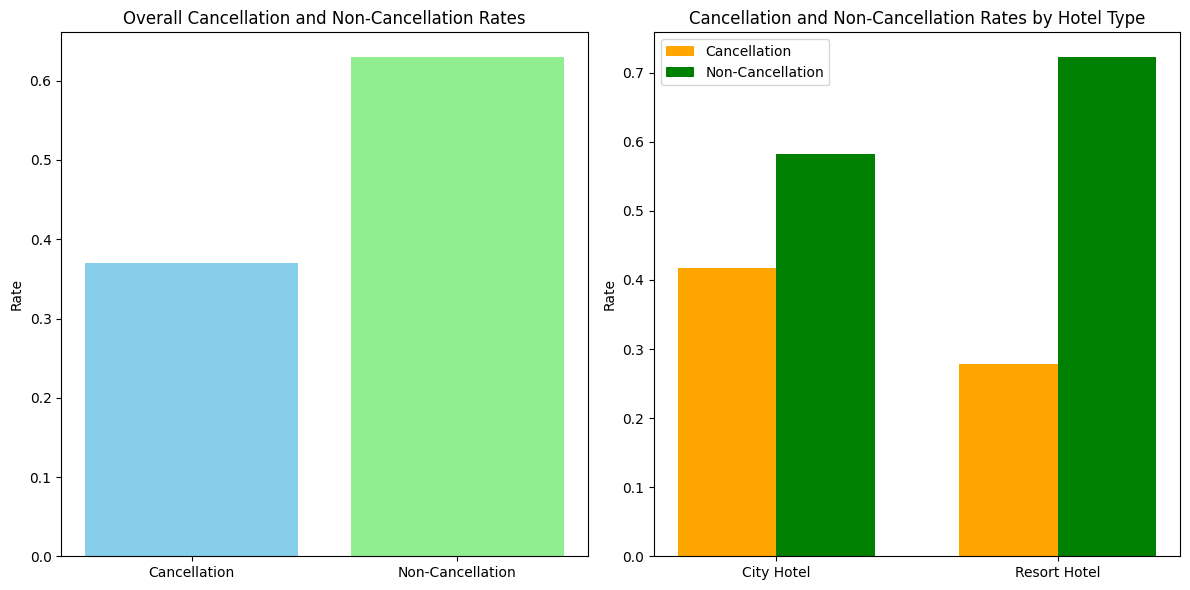

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Calculate overall cancellation and non-cancellation rates
overall_cancel_rate = hotels['is_canceled'].mean()
overall_non_cancel_rate = 1 - overall_cancel_rate

print("Overall Cancellation Rate:", overall_cancel_rate)
print("Overall Non-Cancellation Rate:", overall_non_cancel_rate)

# Calculate cancellation and non-cancellation rates by hotel type
cancel_rate_by_hotel = hotels.groupby('hotel')['is_canceled'].mean()
non_cancel_rate_by_hotel = 1 - cancel_rate_by_hotel

print("Cancellation Rates by Hotel Type:")
print(cancel_rate_by_hotel)

# Plotting
plt.figure(figsize=(12, 6))

# Left bar chart - Overall cancellation and non-cancellation rates for all hotels
plt.subplot(1, 2, 1)
plt.bar(['Cancellation', 'Non-Cancellation'], [overall_cancel_rate, overall_non_cancel_rate], color=['skyblue', 'lightgreen'])
plt.title('Overall Cancellation and Non-Cancellation Rates')
plt.ylabel('Rate')

# Right bar chart - Cancellation and non-cancellation rates by hotel type
plt.subplot(1, 2, 2)
width = 0.35
hotel_types = ['City Hotel', 'Resort Hotel']
cancel_bars = plt.bar([x - width/2 for x in range(2)], cancel_rate_by_hotel, width, label='Cancellation', color='orange')
non_cancel_bars = plt.bar([x + width/2 for x in range(2)], non_cancel_rate_by_hotel, width, label='Non-Cancellation', color='green')
plt.xticks(range(2), hotel_types)
plt.title('Cancellation and Non-Cancellation Rates by Hotel Type')
plt.ylabel('Rate')
plt.legend()

plt.tight_layout()
plt.show()

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Create side-by-side bar charts comparing the cancellation rates by each hotel type.
We've imported our dataset to the pandas DataFrame `hotels` which has the relevant columns:
- `hotel` indicates a Resort Hotel or City Hotel
- `is_canceled` indicates the cancellation status
The left bar chart should plot the overall cancellation and non-cancellation rates for all hotels.
The right bar chart should compare the cancellation and non-cancellation rates for each hotel type.
Print out the cancellation rates for both plots.
```

</details>
<br>
<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
Here's the Python code to create side-by-side bar charts comparing the cancellation rates by each hotel type and print out the cancellation rates for both plots:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Calculate overall cancellation and non-cancellation rates
overall_cancel_rate = hotels['is_canceled'].mean()
overall_non_cancel_rate = 1 - overall_cancel_rate

print("Overall Cancellation Rate:", overall_cancel_rate)
print("Overall Non-Cancellation Rate:", overall_non_cancel_rate)

# Calculate cancellation and non-cancellation rates by hotel type
cancel_rate_by_hotel = hotels.groupby('hotel')['is_canceled'].mean()
non_cancel_rate_by_hotel = 1 - cancel_rate_by_hotel

print("Cancellation Rates by Hotel Type:")
print(cancel_rate_by_hotel)

# Plotting
plt.figure(figsize=(12, 6))

# Left bar chart - Overall cancellation and non-cancellation rates for all hotels
plt.subplot(1, 2, 1)
plt.bar(['Cancellation', 'Non-Cancellation'], [overall_cancel_rate, overall_non_cancel_rate], color=['skyblue', 'lightgreen'])
plt.title('Overall Cancellation and Non-Cancellation Rates')
plt.ylabel('Rate')

# Right bar chart - Cancellation and non-cancellation rates by hotel type
plt.subplot(1, 2, 2)
width = 0.35
hotel_types = ['City Hotel', 'Resort Hotel']
cancel_bars = plt.bar([x - width/2 for x in range(2)], cancel_rate_by_hotel, width, label='Cancellation', color='orange')
non_cancel_bars = plt.bar([x + width/2 for x in range(2)], non_cancel_rate_by_hotel, width, label='Non-Cancellation', color='green')
plt.xticks(range(2), hotel_types)
plt.title('Cancellation and Non-Cancellation Rates by Hotel Type')
plt.ylabel('Rate')
plt.legend()

plt.tight_layout()
plt.show()

This code will calculate the overall cancellation and non-cancellation rates for all hotels, as well as the cancellation rates by hotel type. It then creates side-by-side bar charts displaying the rates and prints out the cancellation rates for both plots.
```

</details>


**Analysis**

The overall cancellation rate across all hotel bookings is about 37.0%. Looking at each hotel type, the cancellation rate for the city hotel is notably higher than the cancellation rate for the resort hotel (41.7% vs 27.8%).

In the next tasks, we'll investigate the dataset further to examine the potential factors that may be able to explain why bookings for the city hotel are more likely to be canceled than bookings for the resort hotel.

## Task Group 2 - Average Daily Rate

### Task 5

The first factor we'll analyze is the average daily rate (ADR) of each booking as it directly affects the revenue of each hotel. For example, if higher ADRs correlate with higher cancellation rates, then we might suspect that price sensitivity might be an important cancellation factor. 

Create a prompt that prints out summary statistics for the `adr` column **and** generates separate box plots for the `adr` of each hotel type.

Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:
                count        mean        std   min   25%   50%    75%     max
hotel                                                                        
City Hotel    79330.0  105.304465  43.602954  0.00  79.2  99.9  126.0  5400.0
Resort Hotel  40060.0   94.952930  61.442418 -6.38  50.0  75.0  125.0   508.0


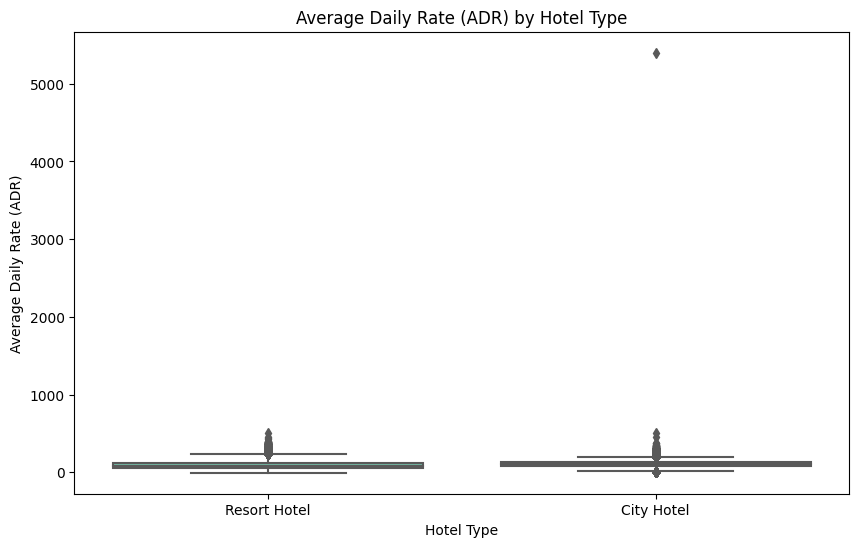

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Step 1: Descriptive summary statistics for the average daily rate (adr) for resort and city hotels
summary_stats = hotels.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:")
print(summary_stats)

# Step 2: Create a boxplot for each type of hotel using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotels, x='hotel', y='adr', palette='Set2')

# Adding labels and title
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')

plt.show()

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Generate descriptive summary statistics and create a figure using seaborn using the DataFrame `hotels`.
- `hotel` indicates a Resort Hotel or City Hotel
- `adr` is each booking's average daily rate as continuous float values
Compute and print out descriptive summary statistics for the average daily rate for resort and city hotels.
Create a boxplot for each type of hotel.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
To achieve this, you can follow these steps:
1. Calculate descriptive summary statistics for the average daily rate (adr) for resort and city hotels.
2. Create a boxplot for each type of hotel using seaborn.

Here's the code to accomplish this:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Step 1: Descriptive summary statistics for the average daily rate (adr) for resort and city hotels
summary_stats = hotels.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:")
print(summary_stats)

# Step 2: Create a boxplot for each type of hotel using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotels, x='hotel', y='adr', palette='Set2')

# Adding labels and title
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')

plt.show()
```

</details>

### Task 6

In the previously generated box plots, you should have discovered a fairly extreme outlier in the `adr` column for the city hotel, making it difficult to compare the two distributions.

Create a prompt that removes the rows from `hotels` that contain outliers in the `adr` column.

Hint: it may be useful to include the summary statistics of the `adr` column for each hotel type generated earlier in the prompt.

In [6]:
import pandas as pd

# Assuming "hotels" DataFrame already contains the relevant data

# Define a threshold for outliers (you can adjust this threshold based on your data and requirements)
adr_threshold_city = 300  # Example threshold for city hotels
adr_threshold_resort = 250  # Example threshold for resort hotels

# Remove rows with "adr" values exceeding the threshold for city hotels
hotels = hotels[~((hotels['hotel'] == 'City Hotel') & (hotels['adr'] > adr_threshold_city))]

# Remove rows with "adr" values exceeding the threshold for resort hotels
hotels = hotels[~((hotels['hotel'] == 'Resort Hotel') & (hotels['adr'] > adr_threshold_resort))]

# Check the DataFrame after removing outliers
print("Number of rows after removing outliers:", len(hotels))

# Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type
summary_stats = hotels.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:")
print(summary_stats)

Number of rows after removing outliers: 118424
Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:
                count        mean        std   min   25%    50%    75%    max
hotel                                                                        
City Hotel    79287.0  105.117922  38.997066  0.00  79.2  99.90  126.0  300.0
Resort Hotel  39137.0   90.465072  54.455561 -6.38  50.0  74.25  120.0  250.0


<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Remove an outlier in the `hotels` DataFrame.
- `hotel` indicates if the hotel is a Resort Hotel or City Hotel
- `adr` is each booking's average daily rate as continuous float values
Remove rows in "hotels" based on the `adr` values.
Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:
                count        mean        std   min   25%   50%    75%     max
hotel                                                                        
City Hotel    79330.0  105.304465  43.602954  0.00  79.2  99.9  126.0  5400.0
Resort Hotel  40060.0   94.952930  61.442418 -6.38  50.0  75.0  125.0   508.0
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
To remove outliers in the `hotels` DataFrame based on the `adr` values, you can define a threshold for what you consider an outlier, and then filter out rows with `adr` values exceeding that threshold. Here's how you can do it:

import pandas as pd

# Assuming "hotels" DataFrame already contains the relevant data

# Define a threshold for outliers (you can adjust this threshold based on your data and requirements)
adr_threshold_city = 300  # Example threshold for city hotels
adr_threshold_resort = 250  # Example threshold for resort hotels

# Remove rows with "adr" values exceeding the threshold for city hotels
hotels = hotels[~((hotels['hotel'] == 'City Hotel') & (hotels['adr'] > adr_threshold_city))]

# Remove rows with "adr" values exceeding the threshold for resort hotels
hotels = hotels[~((hotels['hotel'] == 'Resort Hotel') & (hotels['adr'] > adr_threshold_resort))]

# Check the DataFrame after removing outliers
print("Number of rows after removing outliers:", len(hotels))

# Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type
summary_stats = hotels.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:")


This code snippet will remove rows from the `hotels` DataFrame where the `adr` values exceed the defined thresholds for city hotels and resort hotels. Adjust the threshold values as needed based on your data and the definition of an outlier for your specific use case. After removing outliers, it will print the descriptive summary statistics for the average daily rate (ADR) by hotel type.print(summary_stats)
```

</details>

### Task 7

Re-create the box plots using the same code from the previous task that generated the visualization. 

Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:
                count        mean        std   min   25%    50%    75%    max
hotel                                                                        
City Hotel    79287.0  105.117922  38.997066  0.00  79.2  99.90  126.0  300.0
Resort Hotel  39137.0   90.465072  54.455561 -6.38  50.0  74.25  120.0  250.0


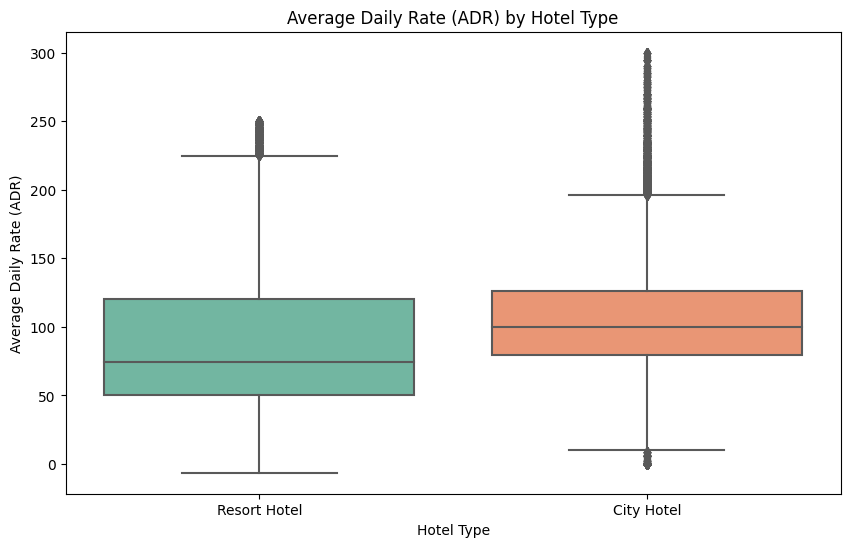

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Step 1: Descriptive summary statistics for the average daily rate (adr) for resort and city hotels
summary_stats = hotels.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics for Average Daily Rate (ADR) by Hotel Type:")
print(summary_stats)

# Step 2: Create a boxplot for each type of hotel using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotels, x='hotel', y='adr', palette='Set2')

# Adding labels and title
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')

plt.show()

**Analysis**

On average, it looks like daily rates at the city hotel are more expensive than the resort hotel. However, we do see that the standard deviation is higher for the resort hotel than the city hotel (having removed outliers!)

The 25th, 50th, and 75th percentiles are quite different between city and resort hotels which we'll need to incorporate into our analysis.

It's also important to note that some bookings have an adr value of 0 (or even below 0). These may be due to discounts, or due to data entry errors.

### Task 8

Let's continue to investigate the average daily rates where instead of analyzing the values as continuous values, we'll analyze them as categories. This will allow us to segment the ADR values into pricing tiers to make it easier and more interpretable to analyze.

Create a prompt that bins the `adr` values into "Low", "Medium", and "High" rate categories as a new column named `adr_category`.

Since the distributions for the city and resort hotel are different, we'll want to specify different value thresholds for these categories. We suggest using their respective 25th, 50th, and 75th percentiles from the summary statistics generated earlier.

For example, we can categorize the `adr` values in the Resort Hotels as "Low" if the booking's `adr` is less than `50.0` which corresponds to the 25th percentile. 

In [8]:
import pandas as pd

# Assuming you already have a DataFrame named 'hotels' with columns 'hotel' and 'adr'

# Function to categorize ADR values
def categorize_adr(row):
    if row['hotel'] == 'Resort Hotel':
        if row['adr'] < 50.0:
            return 'Low'
        elif row['adr'] >= 120.0:
            return 'High'
        else:
            return 'Medium'
    elif row['hotel'] == 'City Hotel':
        if row['adr'] < 79.20:
            return 'Low'
        elif row['adr'] >= 126.0:
            return 'High'
        else:
            return 'Medium'

# Apply the categorization function to create a new column 'adr_category'
hotels['adr_category'] = hotels.apply(categorize_adr, axis=1)

# Preview the first five rows of relevant columns
hotels[['hotel', 'adr', 'adr_category']].head()

,hotel,adr,adr_category
0,Resort Hotel,0.0,Low
1,Resort Hotel,0.0,Low
2,Resort Hotel,75.0,Medium
3,Resort Hotel,75.0,Medium
4,Resort Hotel,98.0,Medium


<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Categorize bookings by their average daily rates for each hotel type in the DataFrame `hotels`.
- `hotel` indicates if the hotel is a Resort Hotel or City Hotel
- `adr` is each booking's average daily rate as continuous float values
Create a new column `adr_category` that categorizes the `adr` values into three bins "Low", "Medium", and "High" where for:
- Resort Hotels: "Low" < 50.0 and "High" >= 120.0, else "Medium"
- City Hotels: "Low" < 79.2 and "High" >= 126.0, else "Medium"
Preview the first five rows of the `hotel`, `adr`, and `adr_category` columns.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
You can achieve this task using pandas in Python. Here's how you can do it:

import pandas as pd

# Assuming you already have a DataFrame named 'hotels' with columns 'hotel' and 'adr'

# Function to categorize ADR values
def categorize_adr(row):
    if row['hotel'] == 'Resort Hotel':
        if row['adr'] < 50.0:
            return 'Low'
        elif row['adr'] >= 120.0:
            return 'High'
        else:
            return 'Medium'
    elif row['hotel'] == 'City Hotel':
        if row['adr'] < 79.20:
            return 'Low'
        elif row['adr'] >= 126.0:
            return 'High'
        else:
            return 'Medium'

# Apply the categorization function to create a new column 'adr_category'
hotels['adr_category'] = hotels.apply(categorize_adr, axis=1)

# Preview the first five rows of relevant columns
hotels[['hotel', 'adr', 'adr_category']].head()

This code will categorize the ADR values for each hotel type according to the specified conditions and create a new column `adr_category` in the DataFrame. Finally, it will print the first five rows of the relevant columns.
```

</details>


### Task 9

Let's now compare the cancellation rates for the resort and city hotels by their ADR category.

Create a prompt that generates a side-by-side bar chart comparing the percentage of cancellations between the resort and city hotel by `adr_category`. 

Be sure the chart is sorted ordinally from "Low", "Medium", to "High". Print the cancellation rates as well.

<Figure size 1000x600 with 0 Axes>

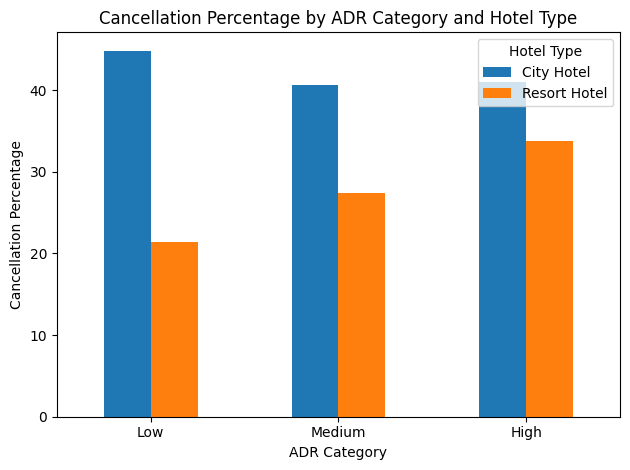

Cancellation Percentages:
hotel         adr_category
City Hotel    High            40.974369
              Low             44.819302
              Medium          40.594908
Resort Hotel  High            33.806386
              Low             21.421226
              Medium          27.409454
Name: is_canceled, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'hotels' with columns 'hotel', 'is_canceled', and 'adr_category'

# Restructure the DataFrame to get cancellation percentages by adr_category and hotel type
cancellation_percentages = hotels.groupby(['hotel', 'adr_category'])['is_canceled'].mean() * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
cancellation_percentages.unstack(level=0).loc[['Low', 'Medium', 'High']].plot(kind='bar', stacked=False)
plt.title('Cancellation Percentage by ADR Category and Hotel Type')
plt.xlabel('ADR Category')
plt.ylabel('Cancellation Percentage')
plt.xticks(rotation=0)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

# Print cancellation percentages
print("Cancellation Percentages:")
print(cancellation_percentages)

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Generate Python code to restructure the DataFrame `hotels`.
- `hotel` indicates if the hotel is a Resort Hotel or City Hotel
- `is_canceled` indicates the cancellation status
- `adr_category` is the average daily rate binned into "Low", "Medium", and "High" categories
Create a bar chart comparing the percentage of cancellations by `adr_category` between resort and city hotels.
Sort the bar chart ordinally by "Low", "Medium", and "High".
Print the cancellation percentages.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
You can achieve this using pandas and matplotlib. Here's the Python code to restructure the DataFrame, create the bar chart, and print the cancellation percentages:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'hotels' with columns 'hotel', 'is_canceled', and 'adr_category'

# Restructure the DataFrame to get cancellation percentages by adr_category and hotel type
cancellation_percentages = hotels.groupby(['hotel', 'adr_category'])['is_canceled'].mean() * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
cancellation_percentages.unstack(level=0).loc[['Low', 'Medium', 'High']].plot(kind='bar', stacked=False)
plt.title('Cancellation Percentage by ADR Category and Hotel Type')
plt.xlabel('ADR Category')
plt.ylabel('Cancellation Percentage')
plt.xticks(rotation=0)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

# Print cancellation percentages
print("Cancellation Percentages:")
print(cancellation_percentages)

This code will restructure the DataFrame to calculate cancellation percentages by ADR category and hotel type. Then, it will create a bar chart comparing these percentages between resort and city hotels, sorted ordinally by "Low", "Medium", and "High", and print the cancellation percentages for each category.
```

</details>

**Analysis**

It looks like there may be some price sensitivity for cancellations. The pattern for the resort hotel is particularly interesting, as it looks like the more expensive bookings are also more likely to be canceled. This is definitely a pattern we might want to investigate further!

## Task Group 3 - Analyze Weekend and Weekday Bookings

### Task 10

Another factor that might be interesting to investigate is the influence of weekday versus weekend bookings on cancellations.

Design a prompt that creates a new column named `weekend_stay` that returns `True` indicating that a part of a booking was on a weekend night or `False` if the booking was strictly only on weekday nights.

The relevant columns in the `hotels` dataset are:
- `stays_in_week_nights` indicating the number of weekend nights booked
- `stays_in_weekend_nights` indicating the number of weekday nights booked

Thinking strategically, the new `weekend_stay` column should return `True` for any value in `stays_in_week_nights` that is greater than `0`.

In [10]:
hotels['weekend_stay'] = hotels['stays_in_weekend_nights'] > 0

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Create a new column named `weekend_stay` in the DataFrame `hotels` using the relevant columns:
- `stays_in_week_nights` indicating the number of weekend nights booked
- `stays_in_weekend_nights` indicating the number of weekday nights booked
The new column `weekend_stay` should return `True` for any value in `stays_in_weekend_nights` greater than 0.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
You can create the new column weekend_stay in the DataFrame hotels using pandas like this:

import pandas as pd

# Assuming 'hotels' is your DataFrame

# Create a new column 'weekend_stay' based on conditions
hotels['weekend_stay'] = hotels['stays_in_weekend_nights'] > 0

# Display the DataFrame to verify changes

print(hotels)
This will add a new column weekend_stay to your DataFrame, where it will be True if there are any weekend nights booked (stays_in_weekend_nights is greater than 0), and False otherwise.
```

</details>

### Task 11

Next, design a prompt that creates a side-by-side bar chart comparing the cancellation rates between the resort and city hotel by weekend and weekday bookings using the newly created column `weekend_stay`.

Cancellation Percentages:
weekend_stay      False       True
hotel                             
City Hotel    42.994364  40.584635
Resort Hotel  22.802867  30.154445


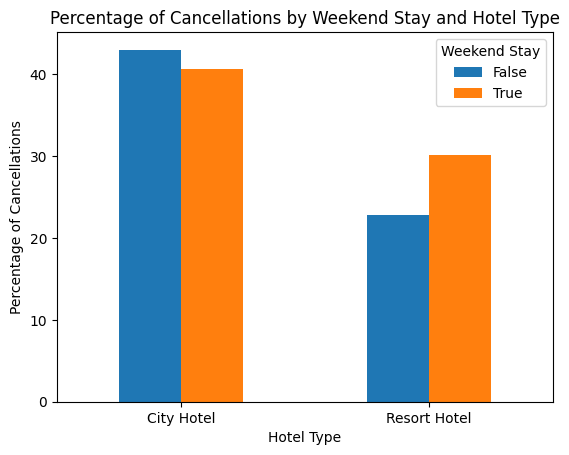

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hotels' is your DataFrame

# Restructure the DataFrame to include only necessary columns
restructured_hotels = hotels[['hotel', 'weekend_stay', 'is_canceled']]

# Group by 'hotel' and 'weekend_stay', calculate cancellation percentages
cancellation_percentage = restructured_hotels.groupby(['hotel', 'weekend_stay'])['is_canceled'].mean() * 100
cancellation_percentage = cancellation_percentage.unstack()

# Print out the cancellation percentages
print("Cancellation Percentages:")
print(cancellation_percentage)

# Plotting the side-by-side bar chart
cancellation_percentage.plot(kind='bar', stacked=False)
plt.title('Percentage of Cancellations by Weekend Stay and Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage of Cancellations')
plt.xticks(rotation=0)
plt.legend(title='Weekend Stay', loc='upper right')
plt.show()

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Generate Python code to restructure the DataFrame `hotels`.
- `hotel` indicates if the hotel is a Resort Hotel or City Hotel
- `weekend_stay` indicates if any portion of the booking was a weekend night
Create a side-by-side bar chart comparing the percentage of cancellations by `weekend_stay` between resort and city hotels.
Print out the percentages.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
Here's the Python code to restructure the DataFrame hotels and create a side-by-side bar chart comparing the percentage of cancellations by weekend_stay between resort and city hotels, along with printing out the percentages:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hotels' is your DataFrame

# Restructure the DataFrame to include only necessary columns
restructured_hotels = hotels[['hotel', 'weekend_stay', 'is_canceled']]

# Group by 'hotel' and 'weekend_stay', calculate cancellation percentages
cancellation_percentage = restructured_hotels.groupby(['hotel', 'weekend_stay'])['is_canceled'].mean() * 100
cancellation_percentage = cancellation_percentage.unstack()

# Print out the cancellation percentages
print("Cancellation Percentages:")
print(cancellation_percentage)

# Plotting the side-by-side bar chart
cancellation_percentage.plot(kind='bar', stacked=False)
plt.title('Percentage of Cancellations by Weekend Stay and Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage of Cancellations')
plt.xticks(rotation=0)
plt.legend(title='Weekend Stay', loc='upper right')
plt.show()

This code will both create a side-by-side bar chart and print out the cancellation percentages by `weekend_stay` between resort and city hotels.
```

</details>

**Analysis**

It looks like the difference between cancellation rates on weekend stays is greater for the resort hotel. We see that bookings made on the weekends had a notably higher cancellation rate of 30.2% compared to 22.8% for non-weekend stays.

For the city hotel, the cancellation rates remained high for both weekend and non-weekend stays though the difference was smaller. Interestingly, the non-weekend stays had a slightly higher cancellation rate of 43.0% compared to a 40.6% cancellation rate for non-weekend stays.

## Task Group 4 - Brainstorm Ideas

### Task 12

So far we've analyzed the cancellation rates based on the ADR pricing categories and comparing weekend versus weekday stays. Let's now use the LLM to help us brainstorm more potential cancellation factors to analyze. 

Create an open-ended prompt to brainstorm ideas for investigating how cancellation factors might be different between the city hotel and the resort hotel.

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Brainstorm 7-10 factors that may contribute to hotel booking cancellations comparing resort hotels and city hotels. 
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>
    
```
1. Seasonality: Resort hotels may experience higher cancellation rates during off-peak seasons due to unpredictable weather conditions or changes in travel plans. City hotels may see cancellations related to events, conferences, or seasonal fluctuations in business travel.

2. Travel Restrictions and Regulations: City hotels may face cancellations due to sudden changes in travel restrictions or regulations, such as visa requirements, quarantine measures, or border closures. Resort hotels may also be affected by travel advisories or restrictions related to natural disasters or environmental concerns.

3. Purpose of Travel: The purpose of travel can significantly impact cancellation rates. City hotels might experience cancellations related to business meetings, conferences, or last-minute changes in itinerary, while resort hotels may see cancellations due to leisure travelers altering vacation plans or unexpected events.

4. Booking Channels: Different booking channels may influence cancellation behavior. Direct bookings may have lower cancellation rates compared to third-party booking platforms, where cancellation policies can vary. Resort hotels might see higher cancellations through third-party channels due to impulse bookings or better deals elsewhere.

5. Cancellation Policies: Varied cancellation policies can affect cancellation rates differently for resort and city hotels. Flexible cancellation policies might lead to more cancellations for city hotels, catering to business travelers with uncertain schedules, while stricter policies may result in fewer cancellations for resort hotels, especially during peak seasons.

6. Economic Factors: Economic downturns or fluctuations in exchange rates can impact cancellation rates differently for resort and city hotels. City hotels may face cancellations due to budget constraints or corporate cutbacks, while resort hotels may experience cancellations from travelers reevaluating discretionary spending on vacations.

7. Competitive Pricing and Offers: Price competitiveness and special offers in the market can influence cancellation rates. City hotels might face cancellations if guests find better deals elsewhere, especially during high-demand periods like major events or holidays. Resort hotels may see cancellations due to guests opting for cheaper alternatives or more attractive packages.

8. Accessibility and Transportation: Ease of access and transportation options can affect cancellation rates. City hotels located near major transportation hubs might experience fewer cancellations compared to remote resort hotels, where cancellations might occur due to logistical challenges or changes in travel plans.

9. Cancellation Experience: Past experiences with cancellations at specific hotels or chains can influence future booking decisions. Negative experiences, such as difficulty in canceling reservations or disputes over refunds, may lead to higher cancellation rates for both resort and city hotels.

10. External Factors and Unforeseen Events: Unpredictable events like natural disasters, political unrest, or health crises can impact cancellation rates for both types of hotels. Resort hotels might see cancellations due to adverse weather conditions or safety concerns, while city hotels may face cancellations related to security alerts or public health emergencies.
```

</details>

### Task 13

Some of the brainstormed ideas are likely not relevant to our specific dataset. Add more context to the prompt by including a list of the column names in the `hotels` DataFrame to help the LLM brainstorm relevant ideas.

Use the `hotels.columns` attribute to obtain a list of the column names.

Create another prompt to brainstorm ideas relevant to our `hotels` dataset.

In [12]:
print(hotels.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_category',
       'weekend_stay'],
      dtype='object')


<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>
    
```
Brainstorm ideas that might contribute to hotel booking cancellations comparing resort hotels and city hotels in the DataFrame `hotels`.
Here is the full list of columns in `hotels`:
hotels.columns = Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
```
    
</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>
    
```
To analyze hotel booking cancellations comparing resort hotels and city hotels using the DataFrame hotels, we can explore various factors that might contribute to cancellations. Here are some ideas based on the provided columns:

1. Lead Time: Longer lead times may lead to higher cancellation rates as plans change. Compare lead times for bookings in resort hotels versus city hotels.

2. Arrival Date: Analyze cancellation rates based on the month, week number, or day of the month of arrival to identify seasonal trends or fluctuations in cancellations for resort and city hotels.

3. Length of Stay: Explore how the length of stay (weekend nights vs. weeknights) influences cancellation rates for different types of hotels.

4. Guest Demographics: Investigate cancellation behavior based on guest demographics such as the number of adults, children, and babies in the booking.

5. Market Segment: Compare cancellation rates across different market segments (e.g., leisure, corporate, group) to understand the impact of the type of traveler on cancellations for resort and city hotels.

6. Booking Changes: Analyze the frequency of booking changes and its correlation with cancellations for resort and city hotels.

7. Deposit Type: Examine cancellation rates for bookings with different deposit types (e.g., non-refundable, refundable) to understand the influence of deposit policies on cancellations.

8. Special Requests: Explore how the number of special requests made by guests relates to cancellation rates for resort and city hotels.

9. Customer Type: Compare cancellation behavior between different customer types (e.g., transient, contract, group) to identify patterns specific to resort and city hotels.

10. Reservation Status: Investigate the distribution of reservation statuses (e.g., canceled, checked-in) and analyze trends in cancellation rates over time for resort and city hotels.

By analyzing these factors in the hotels DataFrame, you can gain insights into the drivers of hotel booking cancellations and how they differ between resort hotels and city hotels.
```

</details>

## Task Group 5 - Explore the Ideas

### Task 14

Select an idea from the list of brainstormed ideas generated by the LLM in the previous task.

Create a prompt to analyze that idea about how it might be an important factor in the difference between the hotel cancellations of the resort and city hotel. Copy + paste the code provided by the LLM in the cell below. 

Hint: Consider adding enough context at each iteration until you find a solution that satisfies your own analytical style!

For example, consider investigating the cancellation rates for each hotel type by the different seasons: Winter, Spring, Summer, and Fall.

<Figure size 1000x600 with 0 Axes>

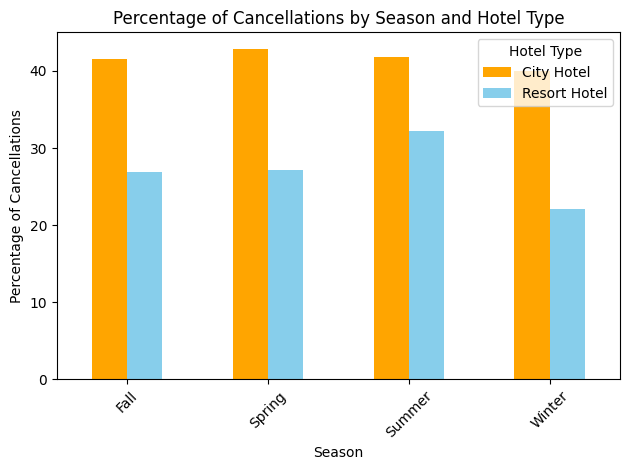

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Step 1: Create a new column 'season' based on the month in 'arrival_date_month'
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}

hotels['season'] = hotels['arrival_date_month'].map(month_to_season)

# Step 2: Calculate the percentage of cancellations for resort and city hotels by season
cancel_rate_by_season = hotels.groupby(['season', 'hotel'])['is_canceled'].mean() * 100

# Step 3: Plot a side-by-side bar chart
plt.figure(figsize=(10, 6))
cancel_rate_by_season.unstack().plot(kind='bar', color=['orange', 'skyblue'])

# Adding legend and axis labels
plt.legend(title='Hotel Type')
plt.title('Percentage of Cancellations by Season and Hotel Type')
plt.xlabel('Season')
plt.ylabel('Percentage of Cancellations')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Use pandas to create a new column in the DataFrame `hotels`.
- `is_canceled` indicates the cancellation status
- `arrival_date_month` indicates the month of the arrival date
Create a new column named `season` based on the month in `arrival_date_month` where the seasons should be "Spring", "Summer", "Fall", and "Winter".
Create a side-by-side bar chart comparing the percentage of cancellations between resort and city hotels by `season`.
Include code to generate a meaningful legend and axis labels for the bar chart.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
To achieve this, you can follow these steps:

1. Create a new column named season based on the month in arrival_date_month.
2. Calculate the percentage of cancellations for resort and city hotels by season.
3. Plot a side-by-side bar chart comparing the percentage of cancellations between resort and city hotels by season.

Here's the code to accomplish this:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Step 1: Create a new column 'season' based on the month in 'arrival_date_month'
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}

hotels['season'] = hotels['arrival_date_month'].map(month_to_season)

# Step 2: Calculate the percentage of cancellations for resort and city hotels by season
cancel_rate_by_season = hotels.groupby(['season', 'hotel'])['is_canceled'].mean() * 100

# Step 3: Plot a side-by-side bar chart
plt.figure(figsize=(10, 6))
cancel_rate_by_season.unstack().plot(kind='bar', color=['orange', 'skyblue'])

# Adding legend and axis labels
plt.legend(title='Hotel Type')
plt.title('Percentage of Cancellations by Season and Hotel Type')
plt.xlabel('Season')
plt.ylabel('Percentage of Cancellations')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This code will create a side-by-side bar chart comparing the percentage of cancellations between resort and city hotels by season. The legend and axis labels are included to make the plot more interpretable.
```

</details>

**Analysis**

The resort hotel does seem to have seasonal cancellation swings, especially when compared to the more steady city hotel. In general, the resort hotel seems to have lower cancellation rates.

### Task 15

Select another idea from the list of brainstormed ideas generated by the LLM.

Again, create a prompt to analyze that idea!

For example, consider analyzing the average lead time by month for each hotel type.

Correlation Coefficient for Resort Hotel: 0.8578065321885532
Correlation Coefficient for City Hotel: 0.4596340508899287


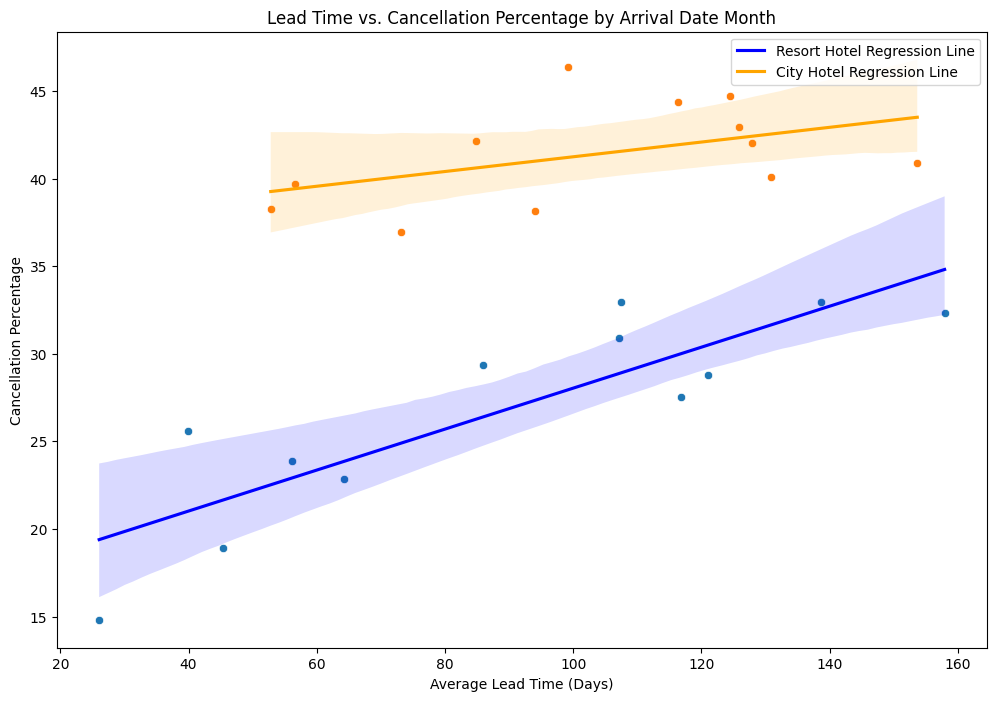

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Group the data by hotel, arrival date month
grouped_data = hotels.groupby(['hotel', 'arrival_date_month'])

# Calculate the average lead time and cancellation percentage for each group
agg_data = grouped_data.agg({'lead_time': 'mean', 'is_canceled': 'mean'}).reset_index()

# Calculate cancellation percentage
agg_data['cancellation_percentage'] = agg_data['is_canceled'] * 100

# Plotting
plt.figure(figsize=(12, 8))

# Scatterplot with regression lines for Resort Hotel
sns.scatterplot(data=agg_data[agg_data['hotel'] == 'Resort Hotel'], 
                x='lead_time', 
                y='cancellation_percentage')

sns.regplot(data=agg_data[agg_data['hotel'] == 'Resort Hotel'], 
            x='lead_time', 
            y='cancellation_percentage', 
            scatter=False, 
            color='blue', 
            label='Resort Hotel Regression Line')

# Scatterplot with regression lines for City Hotel
sns.scatterplot(data=agg_data[agg_data['hotel'] == 'City Hotel'], 
                x='lead_time', 
                y='cancellation_percentage')

sns.regplot(data=agg_data[agg_data['hotel'] == 'City Hotel'], 
            x='lead_time', 
            y='cancellation_percentage', 
            scatter=False, 
            color='orange', 
            label='City Hotel Regression Line')

# Compute correlation coefficients
resort_corr = agg_data[agg_data['hotel'] == 'Resort Hotel']['lead_time'].corr(agg_data[agg_data['hotel'] == 'Resort Hotel']['cancellation_percentage'])
city_corr = agg_data[agg_data['hotel'] == 'City Hotel']['lead_time'].corr(agg_data[agg_data['hotel'] == 'City Hotel']['cancellation_percentage'])

print("Correlation Coefficient for Resort Hotel:", resort_corr)
print("Correlation Coefficient for City Hotel:", city_corr)

# Adding legend
plt.legend()
plt.title('Lead Time vs. Cancellation Percentage by Arrival Date Month')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Cancellation Percentage')

plt.show()

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
<br>

```
Generate Python code to restructure a pandas DataFrame and create a figure using Seaborn.
We've imported our dataset to the pandas DataFrame `hotels` which has the relevant columns:
- `hotel` indicates a Resort Hotel or City Hotel
- `is_canceled` indicates the cancellation status
- `arrival_date_month` indicates the month of the arrival date
- `lead_time` is the number of days from the booking date to the arrival date
First group the data by `hotel` and create a scatterplot that plots the average lead time for each `arrival_date_month`
against the percentage of cancellations for that month comparing resort and city hotels.
Include and label the best-fit regression lines in the plot and compute the correlation coefficients.
```

</details>

<br>

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>
<br>

```
Here's the Python code to achieve the described task using pandas and Seaborn:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "hotels" DataFrame already contains the relevant data

# Group the data by hotel, arrival date month
grouped_data = hotels.groupby(['hotel', 'arrival_date_month'])

# Calculate the average lead time and cancellation percentage for each group
agg_data = grouped_data.agg({'lead_time': 'mean', 'is_canceled': 'mean'}).reset_index()

# Calculate cancellation percentage
agg_data['cancellation_percentage'] = agg_data['is_canceled'] * 100

# Plotting
plt.figure(figsize=(12, 8))

# Scatterplot with regression lines for Resort Hotel
sns.scatterplot(data=agg_data[agg_data['hotel'] == 'Resort Hotel'], 
                x='lead_time', 
                y='cancellation_percentage')

sns.regplot(data=agg_data[agg_data['hotel'] == 'Resort Hotel'], 
            x='lead_time', 
            y='cancellation_percentage', 
            scatter=False, 
            color='blue', 
            label='Resort Hotel Regression Line')

# Scatterplot with regression lines for City Hotel
sns.scatterplot(data=agg_data[agg_data['hotel'] == 'City Hotel'], 
                x='lead_time', 
                y='cancellation_percentage')

sns.regplot(data=agg_data[agg_data['hotel'] == 'City Hotel'], 
            x='lead_time', 
            y='cancellation_percentage', 
            scatter=False, 
            color='orange', 
            label='City Hotel Regression Line')

# Compute correlation coefficients
resort_corr = agg_data[agg_data['hotel'] == 'Resort Hotel']['lead_time'].corr(agg_data[agg_data['hotel'] == 'Resort Hotel']['cancellation_percentage'])
city_corr = agg_data[agg_data['hotel'] == 'City Hotel']['lead_time'].corr(agg_data[agg_data['hotel'] == 'City Hotel']['cancellation_percentage'])

print("Correlation Coefficient for Resort Hotel:", resort_corr)
print("Correlation Coefficient for City Hotel:", city_corr)

# Adding legend
plt.legend()
plt.title('Lead Time vs. Cancellation Percentage by Arrival Date Month')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Cancellation Percentage')

plt.show()

This code will generate a scatterplot comparing the average lead time to the cancellation percentage for each month, distinguishing between resort and city hotels. It includes labeled regression lines for both hotel types and computes the correlation coefficients for each.
```

</details>

**Analysis**

The positive correlation coefficients for both the resort and city hotels suggest that as the average lead time by month increases, the cancellation percentage tends to increase as well, and vice versa (remember correlation does not equal causation!).

Notably, there is a much stronger positive correlation for the resort hotel compared to the city hotel (0.845 vs 0.459) which means that this could be an important factor to investigate further into why there might be a difference in cancellation rates by each hotel type.

Here are some potential reasons to think about:

- booking resort hotels may require more planning time as travelers need to coordinate time off work, vacation days, and special accommodations
- seasonality or holidays may drive up demand and limit availability so travelers may need to book the hotel further in advance



**End of Project**

So that concludes our project on analyzing and comparing the hotel booking cancellations rates between city and resort hotels. There is so much more to explore and potential insights to uncover in this dataset. You might consider prompting the LLM to brainstorm more ideas but here are some ideas to investigate further:

- Hypothesis test to see if the differences we found in cancellation rates are statistically significant
- Train a machine learning classification model to predict cancellations
- Train a machine learning regression model to predict the average daily rates

Feel free to add more cells below and happy prompting and coding!